## RANSAC
* random sample consensus
* 데이터셋에서 노이즈를 제거하고 모델을 예측하는 알고리즘
* 특정 임계값을 기준으로 데이터를 무시하고 모델 생성
    + 노이즈를 반영하지 않고 최대 데이터가 일치하는 이상적 모델 생성
    + 즉, 가장 많은 수의 데이터로부터 지지를 받는 모델을 생성

<img src='img/ransac01.png'>

<img src='img/ransac02.png'>

<img src='img/ransac03.png' width="50%">

### RANSAC 알고리즘
+ 가설단계 : 전체 데이터에서 N개의 표본을 선택하고, 선택된 표본(inlier)으로부터 모델을 예측한다
+ 검증단계 : 데이터셋에서 모델과 일치하는 데이터수를 센 후 최대값인 경우 모델의 매개변수를 새롭게 저장함
+ RANSAC은 가설과 검증을 N번 반복해서 그 중 최고의 모델을 선정함
+ sklearn에서는 RANSACRegressor라는 객체를 제공
+ 매개변수 : 임계값, 표본수



<img src='img/ransac04.png'>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 보스턴 집값 데이터에서 방수RM과 평균값 Mdev에 대해 회귀분석과 RANSAC 분석 실시하고 결과를 비교하기

In [17]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import seaborn as sns

In [12]:
from sklearn.datasets import load_boston

In [82]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MDEV'] = boston.target

In [83]:
X = df.RM    # 방수
y = df.MDEV  # 주택가격

### 단순선형회귀

#### 산점도

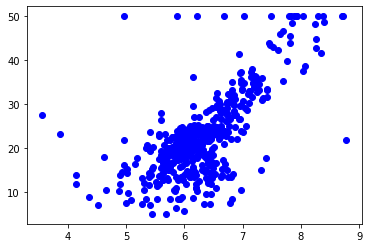

In [84]:
plt.plot(X,y,'bo')

#### 선형회귀

In [85]:
X = np.array(X).reshape(-1,1)
lrclf = LinearRegression()
lrclf.fit(X, y)
pred = lrclf.predict(X)

#### 선형모델의 계수

In [86]:
a = lrclf.coef_
b = lrclf.intercept_
print(a,b)

[9.10210898] -34.67062077643857


#### 모델 성능 평가

In [87]:
rmse = np.sqrt(mean_squared_error(y, pred))
r2 = r2_score(y, pred)
print(rmse,r2)

6.603071389222561 0.48352545599133423


#### 회귀선 시각화

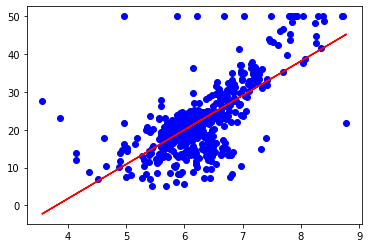

In [30]:
z = lrclf.predict(X)
plt.plot(X,y, 'bo')
plt.plot(X,z, 'r-')

### RANSAC 선형회귀 실시

In [31]:
from sklearn.linear_model import RANSACRegressor

In [51]:
lrclf2 = lrclf = LinearRegression()
ransac = RANSACRegressor(lrclf2, max_trials=500, min_samples=50, loss='absolute_error', residual_threshold=5.0, random_state=2111091045)
ransac.fit(X, y) 
# max_trais : 알고리즘 최대 반복횟수
# min_samples : 모델 선정에 사용할 무작위 표본의 최소수
# loss : 모델의 성능 평가에 사용할 함수 지정
# absolute_error : 절대값 
# residual_thresold : 정상치에 포함할 허용오차

RANSACRegressor(base_estimator=LinearRegression(), max_trials=500,
                min_samples=50, random_state=2111091045,
                residual_threshold=5.0)

#### 선형모델의 계수

In [46]:
a = ransac.estimator_.coef_
b = ransac.estimator_.intercept_
print(a,b)

[10.13609866] -40.2080937417566


#### 정상치inlier와 이상치outlier 추출

In [61]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


#### 회귀선 시각화를 위한 변수 생성


In [62]:
z = ransac.predict(X[inlier_mask])

#### 정상치와 이상치 시각화

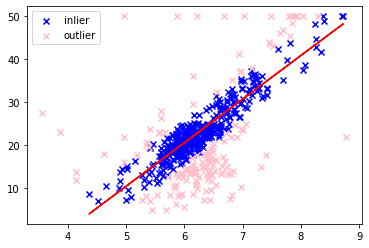

In [63]:
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='x', label = 'inlier')
plt.scatter(X[outlier_mask], y[outlier_mask], c='pink', marker='x', label = 'outlier')
plt.legend()
plt.plot(X[inlier_mask], z, 'r-')

In [65]:
rmse = np.sqrt(mean_squared_error(y[inlier_mask], z))
r2 = r2_score(y[inlier_mask], z)
print('%.2f' % rmse, '%.2f' % r2)

2.47 0.88


#### 데이터에서 임의의 표본을 n개 선택하여 이를 inlier(정상치)로 가정하고 회귀 모델을 구함

#### 나머지 데이터들을 회귀 모델과 비교 - 허용 오차내에 있는 데이터들을 inlier로 포함

#### 재구성된 inlier를 이용해 다시 회귀 모델을 구하고 오차 측정

#### 오차가 허용오차보다 크거나 반복횟수에 도달하면 작업 종료


### LSTAT으로 해보기

In [125]:
X1 = df.LSTAT

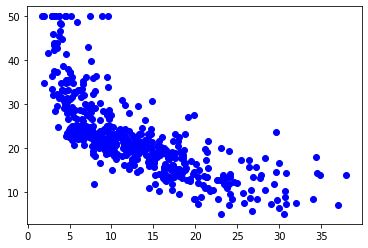

In [126]:
plt.plot(X1,y,'bo') 
# 산점도

In [127]:
X1 = np.array(X1).reshape(-1,1)
lrclf = LinearRegression()
lrclf.fit(X1, y)
pred = lrclf.predict(X1)
# 어레이 변환 및 선형회귀

In [128]:
a = lrclf.coef_
b = lrclf.intercept_
print('%.2f' % a, '%.2f' % b) 
# 회귀계수

-0.95 34.55


In [103]:
rmse = np.sqrt(mean_squared_error(y, pred))
r2 = r2_score(y, pred)
print('%.2f' % rmse, '%.2f' % r2)
# 모델 성능 평가

6.20 0.54


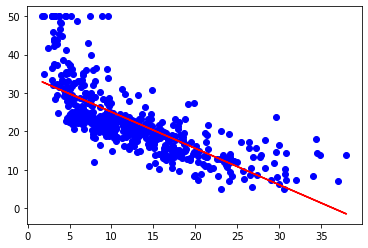

In [130]:
plt.plot(X1,y, 'bo')
plt.plot(X1,pred, 'r-')
# 회귀선 시각화

In [131]:
lrclf3 = lrclf = LinearRegression()
ransac = RANSACRegressor(lrclf3, max_trials=500, min_samples=50, loss='absolute_error', residual_threshold=5.0, random_state=2111091205)
ransac.fit(X1, y) 
# max_trais : 알고리즘 최대 반복횟수
# min_samples : 모델 선정에 사용할 무작위 표본의 최소수
# loss : 모델의 성능 평가에 사용할 함수 지정
# absolute_error : 절대값 
# residual_thresold : 정상치에 포함할 허용오차
# RANSAC 선형회귀 변수

RANSACRegressor(base_estimator=LinearRegression(), max_trials=500,
                min_samples=50, random_state=2111091205,
                residual_threshold=5.0)

In [132]:
a = ransac.estimator_.coef_
b = ransac.estimator_.intercept_
print(a,b)
# RANSAC 선형회귀 계수

[-0.74347328] 29.828872956329434


In [133]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
# 정상치와 이상치 추출

In [134]:
z1 = ransac.predict(X1[inlier_mask])
# RANSAC 시각화를 위한 변수 생성

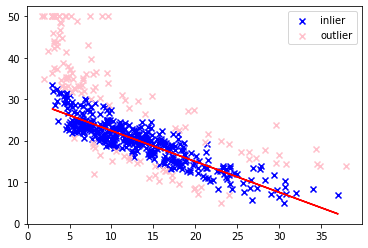

In [135]:
plt.scatter(X1[inlier_mask], y[inlier_mask], c='blue', marker='x', label = 'inlier')
plt.scatter(X1[outlier_mask], y[outlier_mask], c='pink', marker='x', label = 'outlier')
plt.legend()
plt.plot(X1[inlier_mask], z1, 'r-')
# 정상치와 이상치 시각화 

In [136]:
rmse = np.sqrt(mean_squared_error(y[inlier_mask], z1))
r2 = r2_score(y[inlier_mask], z1)
print('%.2f' % rmse, '%.2f' % r2) 

2.41 0.80


#### train test split

In [112]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y, train_size=0.7, random_state=2111001130)

In [113]:
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [114]:
print('%.2f' % lrclf.coef_[0], '%.2f' % lrclf.intercept_)

-0.94 34.36


In [115]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

6.58 0.55


In [116]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X1[inlier_mask], y[inlier_mask], train_size=0.7, random_state=2111001130)

In [117]:
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [118]:
print('%.2f' % lrclf.coef_[0], '%.2f' % lrclf.intercept_)

-0.73 29.73


In [119]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

2.45 0.81
